
## Criação do DataFrame a partir do arquivo csv

In [46]:
import pandas as pd

df = pd.read_csv("FINBRA_Estados-DF_Despesas por Função_2018-2021 - Finbra_2018-2021.csv")
df.columns = ['Ano','Instituição','Cod.IBGE','UF','População','tipo','Conta','Identificador da Conta','Valor(R$)']
df = df.iloc[4:]
df

,Ano,Instituição,Cod.IBGE,UF,População,tipo,Conta,Identificador da Conta,Valor(R$)
4,2018,Governo do Estado do Mato Grosso,51,MT,3305531,Despesas Empenhadas,Despesas Exceto Intraorçamentárias,siconfi-cor_TotalDespesas,"17.199.441.858,54"
5,2018,Governo do Estado do Mato Grosso,51,MT,3305531,Despesas Empenhadas,01 - Legislativa,siconfi-cor_TotalDespesas,"739.689.951,28"
6,2018,Governo do Estado do Mato Grosso,51,MT,3305531,Despesas Empenhadas,01.031 - Ação Legislativa,siconfi-cor_TotalDespesas,"42.211.494,05"
7,2018,Governo do Estado do Mato Grosso,51,MT,3305531,Despesas Empenhadas,01.032 - Controle Externo,siconfi-cor_TotalDespesas,"39.399.777,41"
8,2018,Governo do Estado do Mato Grosso,51,MT,3305531,Despesas Empenhadas,01.122 - Administração Geral,siconfi-cor_TotalDespesas,"559.248.199,65"
...,...,...,...,...,...,...,...,...,...
59283,2021,Governo do Estado de Roraima,14,RR,631181,Inscrição de Restos a Pagar Processados,26.782 - Transporte Rodoviário,siconfi-cor_TotalDespesas,"129834,1"
59284,2021,Governo do Estado de Roraima,14,RR,631181,Inscrição de Restos a Pagar Processados,27 - Desporto e Lazer,siconfi-cor_TotalDespesas,"195426,26"
59285,2021,Governo do Estado de Roraima,14,RR,631181,Inscrição de Restos a Pagar Processados,27.811 - Desporto de Rendimento,siconfi-cor_TotalDespesas,66825
59286,2021,Governo do Estado de Roraima,14,RR,631181,Inscrição de Restos a Pagar Processados,27.812 - Desporto Comunitário,siconfi-cor_TotalDespesas,"128601,26"


In [47]:
df.Instituição = df.Instituição.str.upper()
governo = input("digite um governo: ")
ano = input("digite o ano: ")
total = df.query(f"Instituição=='{governo.upper()}' and Ano=='{ano}' and tipo in ['Despesas Empenhadas', 'Despesas Liquidadas', 'Despesas Pagas']")

digite um governo: governo do estado de pernambuco
digite o ano: 2021




---
# **Assistência social**

---



# Total Despesas Empenhadas

In [48]:
despesas_empenhadas = total.query(f"tipo=='Despesas Empenhadas' and Conta=='08 - Assistência Social'")
despesas_empenhadas = despesas_empenhadas['Valor(R$)'].iloc[0]
print(f'Saldo total Despesas Empenhadas em {ano}: R${despesas_empenhadas.split()[0]}')
despesas_empenhadassoc = despesas_empenhadas.split()[0]

Saldo total Despesas Empenhadas em 2021: R$209836821


# Total Despesas Pagas

In [49]:
despesas_pagas = total.query(f"tipo=='Despesas Pagas' and Conta=='08 - Assistência Social'")
despesas_pagas = despesas_pagas['Valor(R$)'].iloc[0]
print(f'Saldo total Despesas Pagas em {ano}: R${despesas_pagas.split()[0]}')
despesas_pagassoc = despesas_pagas.split()[0]

Saldo total Despesas Pagas em 2021: R$208540356,7


# Gráfico Despesas Pagas x Despesas Empenhadas

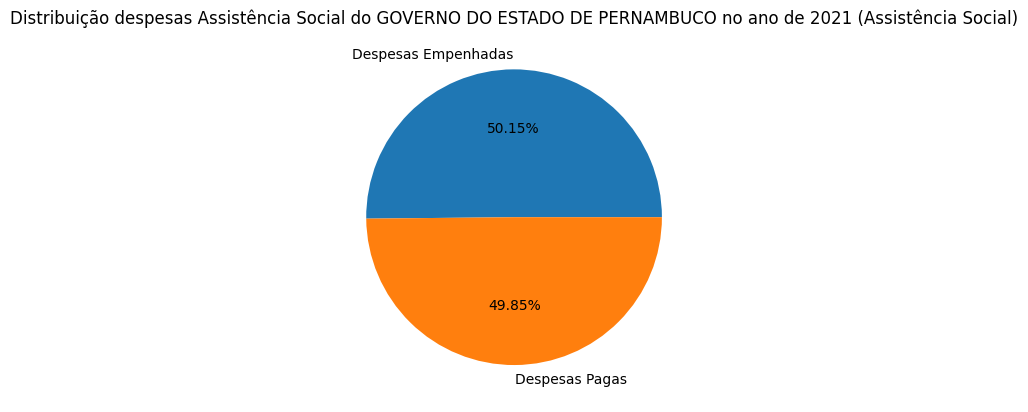

In [50]:
# tratamento valor despesas pagas
valor_pagas = despesas_pagas.split()[0].replace('.','')
valor_pagas = valor_pagas.replace(',','.')

if float(valor_pagas) % 1 != 0:
  numero = int(valor_pagas[:valor_pagas.index('.')])
  centavos = int(valor_pagas[valor_pagas.index('.') +1:])
else:
  numero = int(valor_pagas)
  centavos = 0
valor_pagas = numero + (centavos/100)

# tratamento valor despesas empenhadas
valor_empenhadas = despesas_empenhadas.split()[0].replace('.','')
valor_empenhadas = valor_empenhadas.replace(',','.')
if float(valor_empenhadas) % 1 != 0:
  numero = int(valor_empenhadas[:valor_empenhadas.index('.')])
  centavos = int(valor_empenhadas[valor_empenhadas.index('.') +1:])
else:
  valor_pagas = int(valor_empenhadas)
  centavos = 0
valor_empenhadas = numero + (centavos/100)

# pie plot
import matplotlib.pyplot as plt
valores = [valor_pagas, valor_empenhadas]
plt.pie(valores, labels=['Despesas Empenhadas', 'Despesas Pagas'], autopct='%1.2f%%')
plt.title(f'Distribuição despesas Assistência Social do {governo.upper()} no ano de {ano} (Assistência Social)')
plt.show()





---


# **Previdência Social**


---



# Total Despesas Empenhadas

In [51]:
despesas_empenhadas = total.query(f"tipo=='Despesas Empenhadas' and Conta=='09 - Previdência Social'")
despesas_empenhadas = despesas_empenhadas['Valor(R$)'].iloc[0]
print(f'Saldo total Despesas Empenhadas em {ano}: R${despesas_empenhadas.split()[0]}')
despesas_empenhadasprev = despesas_empenhadas.split()[0]

Saldo total Despesas Empenhadas em 2021: R$6844539243


# Total Despesas Pagas

In [52]:
despesas_pagas = total.query(f"tipo=='Despesas Pagas' and Conta=='09 - Previdência Social'")
despesas_pagas = despesas_pagas['Valor(R$)'].iloc[0]
print(f'Saldo total Despesas Pagas em {ano}: R${despesas_pagas.split()[0]}')
despesas_pagasprev = despesas_pagas.split()[0]

Saldo total Despesas Pagas em 2021: R$6843967074


# Gráfico Despesas Pagas x Despesas Empenhadas

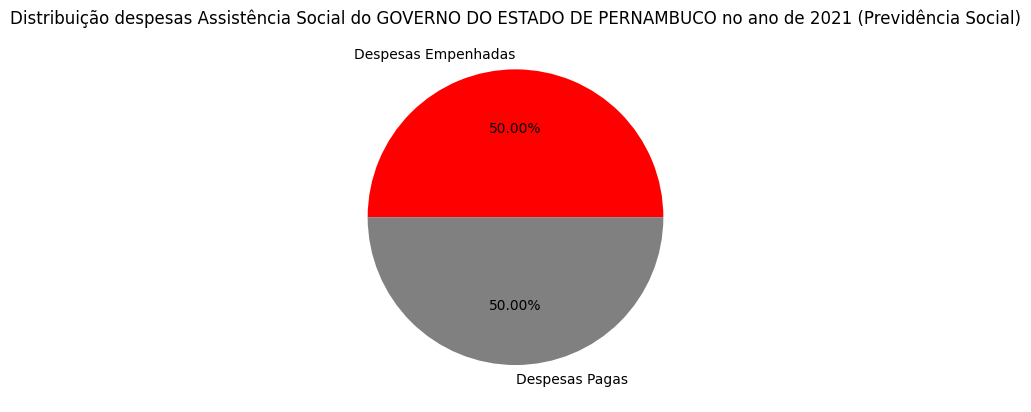

In [53]:
# tratamento valor despesas pagas
valor_pagas = despesas_pagas.split()[0].replace('.','')
valor_pagas = valor_pagas.replace(',','.')

if float(valor_pagas) % 1 != 0:
  numero = int(valor_pagas[:valor_pagas.index('.')])
  centavos = int(valor_pagas[valor_pagas.index('.') +1:])
else:
  numero = float(valor_pagas)
  centavos = 0
valor_pagas = numero + (centavos/100)

# tratamento valor despesas empenhadas
valor_empenhadas = despesas_empenhadas.split()[0].replace('.','')
valor_empenhadas = valor_empenhadas.replace(',','.')

if float(valor_empenhadas) % 1 != 0:
  numero = int(valor_empenhadas[:valor_empenhadas.index('.')])
  centavos = int(valor_empenhadas[valor_empenhadas.index('.') +1:])
else:
  valor_pagas = int(valor_empenhadas)
  centavos = 0
valor_empenhadas = numero + (centavos/100)

# pie plot
import matplotlib.pyplot as plt
valores = [valor_pagas, valor_empenhadas]
plt.pie(valores, labels=['Despesas Empenhadas', 'Despesas Pagas'], autopct='%1.2f%%', colors=['red', 'gray'])
plt.title(f'Distribuição despesas Assistência Social do {governo.upper()} no ano de {ano} (Previdência Social)')
plt.show()

---
# **Saúde**
---

# Total Despesas Empenhadas

In [54]:
despesas_empenhadas = total.query(f"tipo=='Despesas Empenhadas' and Conta=='10 - Saúde'")
despesas_empenhadas = despesas_empenhadas['Valor(R$)'].iloc[0]
print(f'Saldo total Despesas Empenhadas em {ano}: R${despesas_empenhadas.split()[0]}')
despesas_empenhadassau = despesas_empenhadas.split()[0]

Saldo total Despesas Empenhadas em 2021: R$7.492.995.052,93


# Total Despesas Pagas

In [55]:
despesas_pagas = total.query(f"tipo=='Despesas Pagas' and Conta=='10 - Saúde'")
despesas_pagas = despesas_pagas['Valor(R$)'].iloc[0]
print(f'Saldo total Despesas Pagas em {ano}: R${despesas_pagas.split()[0]}')
despesas_pagassau = despesas_pagas.split()[0]

Saldo total Despesas Pagas em 2021: R$7153522149


# Gráfico Despesas Pagas x Despesas Empenhadas

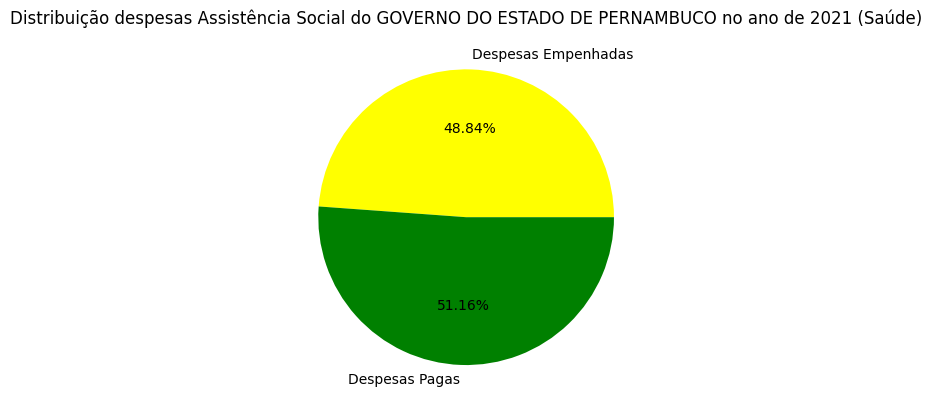

In [56]:
# tratamento valor despesas pagas
valor_pagas = despesas_pagas.split()[0].replace('.','')
valor_pagas = valor_pagas.replace(',','.')

if float(valor_pagas) % 1 != 0:
  numero = int(valor_pagas[:valor_pagas.index('.')])
  centavos = int(valor_pagas[valor_pagas.index('.') +1:])
else:
  numero = float(valor_pagas)
  centavos = 0
valor_pagas = numero + (centavos/100)

# tratamento valor despesas empenhadas
valor_empenhadas = despesas_empenhadas.split()[0].replace('.','')
valor_empenhadas = valor_empenhadas.replace(',','.')
if float(valor_empenhadas) % 1 != 0:
  numero = int(valor_empenhadas[:valor_empenhadas.index('.')])
  centavos = int(valor_empenhadas[valor_empenhadas.index('.') +1:])
else:
  valor_pagas = float(valor_empenhadas)
  centavos = 0
valor_empenhadas = numero + (centavos/100)

# pie plot
import matplotlib.pyplot as plt
valores = [valor_pagas, valor_empenhadas]
plt.pie(valores, labels=['Despesas Empenhadas', 'Despesas Pagas'], autopct='%1.2f%%', colors=['yellow', 'green'])
plt.title(f'Distribuição despesas Assistência Social do {governo.upper()} no ano de {ano} (Saúde)')
plt.show()